# Quick Start - Above Ground Biomass - Species-agnostic

## Overview

This notebook walks us through an introduction to making a request to Above Ground Biomass (AGB) Geospatial Analystics API for Species agnostic Data Layer.

Above Ground Biomass (AGB) Geospatial Analystics APIs are available as <i>Geospatial Analytics V4 API</i> version, as an additional functionality over Geospatial Analytics V3 API version

Geospatial Analytics - Above Ground Biomass (AGB) supports both historical carbon units retrieval and prediction of the same based on the available data. Let's say the user requests information for 2023 and 2024, of which the system has the data for 2023 alone and doesn't pertain the 2024's data, instead of not retrieving anything the system predicts the 2024's information relying on 2023's data for reference.

For all future predictions in all the below examples, the predictive models use the Coupled Model Intercomparison Project Phase 6 (CMIP6) – climate change patterns data and Soil Grid data. 

The primary use case is for calculating historic and future carbon units bases on species-agnostic data layer that is able to generate baseline and predictive results.

Above Ground Biomass (AGB) Species agnostic Data Layer is a data layer that provides the historical and predictive carbon units and CO2 captures without any dependency on specific species. 

<b>The Above Ground Biomass (AGB) Data Set is currently having the geo coverage for Brazil in the temporal range from 2015 to 2100.</b>

Before starting, you have to install ibm pairs using `pip3 install -U ibmpairs`

<b>Note:</b> To run this notebook seamlessly, you have to first configure your Geospatial Analytics API credentials in a file named `secrets.ini` in the below format:

```
[EIS]
api.host = https://api.ibm.com/geospatial/run/na/core/v4
api.key = <Your Geospatial Analytics API key>
api.tenant_id = <Your Geospatial Analytics Tenant ID>
api.org_id = <Your Geospatial Analytics Org ID>
```

Keep the secrets.ini file at an appropriate relative location of this notebook. For example, as specified in the below config.

```config.read('../../auth/secrets.ini')```

<b>Note:</b> Let's start with some utility functions that we are going to use through out this notebook, which is not a necessity but are good to use functions that we are defining to enrich user experience through this notebook.

In [42]:
import pandas as pd

# Removing the max col width on the table to display the entire data.
pd.set_option('display.max_colwidth', None)

The following code snippet submits the query for the AGB Data Layer <i>above-ground-biomass</i>  for years 2020, 2021, 2022, 2023 and 2024 using Geospatial Analytics V4 query API, waits for it to finish, downloads the data to the download folder, loads the data to memory and displays it on screen. This could take a few minutes to complete as all the data is brought together.

Let's go ahead, define and submit a query.

<b>Note:</b> Before starting, we have to install ibm pairs using `pip3 install -U ibmpairs`

In [43]:
# install the EIS SDK if not installed already
# pip3 install -U ibmpairs 
import ibmpairs.authentication as authentication
import ibmpairs.client as client
import ibmpairs.query as query
import ibmpairs.catalog as catalog
import matplotlib.pyplot as plt
import os
import json
import rasterio

import configparser

config = configparser.RawConfigParser()
config.read('../../auth/secrets.ini')

EIS_ORG_ID     = config.get('EIS', 'api.org_id') 
EIS_TENANT_ID  = config.get('EIS', 'api.tenant_id') 
EIS_APIKEY     = config.get('EIS', 'api.key')

EIS_client_v4 = client.get_client(org_id    = EIS_ORG_ID,
                                  tenant_id = EIS_TENANT_ID,
                                  api_key     = EIS_APIKEY,
                                  version   = 4
                                )

area_title="Above Ground Biomass - Species agnostic"

species_agnostic_query_object = query.submit({ 
                          "name": area_title,
                          "spatial": {
                            "geojson": {
                                  "type": "Feature",
                                  "geometry": {
                                  "type":"MultiPolygon",  
                                  "coordinates": [[[[-60.3843,-3.2659], [-60.1694, -2.3564], [-59.9605, -2.2719],
                                                    [-59.7840, -3.2582], [-60.3843, -3.2659] ]]] }   
                            } },
                          "temporal": { "years": [2020, 2021, 2022, 2023, 2024] },
                          "layers": [ { "datalayer": "above-ground-biomass" } ]
                        },EIS_client_v4)

# download the result of the query (this will poll until the result is ready)
species_agnostic_query_object.download(verify=False)

2024-06-06 14:59:00 - paw - INFO - The client authentication method is assumed to be OAuth2.
2024-06-06 14:59:00 - paw - INFO - Legacy Environment is False
2024-06-06 14:59:00 - paw - INFO - The authentication api key type is assumed to be IBM EIS, because the api key prefix 'PHX' is present.
2024-06-06 14:59:02 - paw - INFO - Authentication success.
2024-06-06 14:59:02 - paw - INFO - HOST: https://api.ibm.com/geospatial/run/na/core/v4
2024-06-06 14:59:02 - paw - INFO - TASK: submit STARTING.
2024-06-06 14:59:04 - paw - INFO - The query was successfully submitted with the id: 1717632000_34143985.
2024-06-06 14:59:04 - paw - INFO - TASK: submit COMPLETED.
2024-06-06 14:59:04 - paw - INFO - TASK: download STARTING.
2024-06-06 14:59:05 - paw - INFO - The query 1717632000_34143985 has the status Initializing.
2024-06-06 14:59:06 - paw - INFO - The query 1717632000_34143985 has the status Initializing.
2024-06-06 14:59:38 - paw - INFO - The query 1717632000_34143985 has the status Running.


{
    "download_file_name": "1717632000_34143985",
    "download_folder": "/Users/srikantht/EIS/Projects/Environmental-Intelligence-internal/geospatial/v4_apis/samples/quickstart/agb_species_agnostic/download/",
    "download_status": "SUCCEEDED",
    "id": "1717632000_34143985",
    "layers": [
        {
            "datalayer": "above-ground-biomass"
        }
    ],
    "merge_response": {},
    "name": "Above Ground Biomass - Species agnostic",
    "spatial": {
        "geojson": {
            "geometry": {
                "coordinates": [
                    [
                        [
                            [
                                -60.3843,
                                -3.2659
                            ],
                            [
                                -60.1694,
                                -2.3564
                            ],
                            [
                                -59.9605,
                                -2.2719
    

Let's look at the summary from the result of the query:

In [56]:
species_agnostic_file_list = species_agnostic_query_object.list_files()
#This gets the folder location of where the query result is downloaded.
download_location = species_agnostic_query_object.get_download_folder() + species_agnostic_query_object.id
summary_file = download_location + '/' +'Above Ground Biomass-above ground biomass summary agb.json'

summary = pd.read_json(summary_file)
display(summary)

,year,layer_name,area_in_ha,baseline_agb_min_units,baseline_agb_max_units,baseline_agb_mean_units,baseline_total_agb_units,baseline_total_carbon_tons,baseline_total_co2_tons,agb_analytics_type,predicted_total_agb_units,predicted_total_carbon_tons,predicted_total_co2_tons
0,2020,above-ground-biomass,470369.65947,0.9,51.30,11.878334,62044456.32,31022228.16,1.138516e+08,historical,NaN,NaN,NaN
1,2021,above-ground-biomass,470369.65947,0.9,41.58,12.975094,67761699.84,33880849.92,1.243427e+08,historical,NaN,NaN,NaN
2,2022,above-ground-biomass,470369.65947,0.9,41.13,12.885414,67304759.04,33652379.52,1.235042e+08,historical,NaN,NaN,NaN
3,2023,above-ground-biomass,470369.65947,0.9,30.06,12.141811,63420687.36,31710343.68,1.163770e+08,historical,NaN,NaN,NaN
4,2024,above-ground-biomass,470369.65947,NaN,NaN,NaN,NaN,NaN,NaN,prediction,6.472042e+07,3.236021e+07,1.187620e+08


Let's define some utility functions to plot the downloaded raster tiff and the summary files.

In [45]:
def get_extent(f):
    with open(f, 'r') as ff:
        stats = json.load(ff)
    boundingBox=stats["boundingBox"]
    myextent = [boundingBox["minLongitude"],boundingBox["maxLongitude"],boundingBox["minLatitude"],boundingBox["maxLatitude" ] ]
    return myextent


def display_raster(raster_file_name, colorMap, title = None, Max=None, Min=None, myextent=None):
    if  raster_file_name.endswith('.tiff'):
        with rasterio.open(raster_file_name) as raster_file:
            if not myextent:
                myextent=get_extent(raster_file_name+".json")
            data = raster_file.read(1)
            plt.figure(figsize = (20, 12))
            if Max is None:
                Max=data.max()
            if Min is None:
                Min = data.min()
            plt.imshow(data, cmap = colorMap, vmin = Min, vmax = Max,extent = myextent)
            if not title:
                title=os.path.basename(raster_file_name)
            plt.title(title)
            plt.colorbar()
            plt.show()
  

Let's display the resulting raster tiff file(s) and the summary file(s) using the above methods.

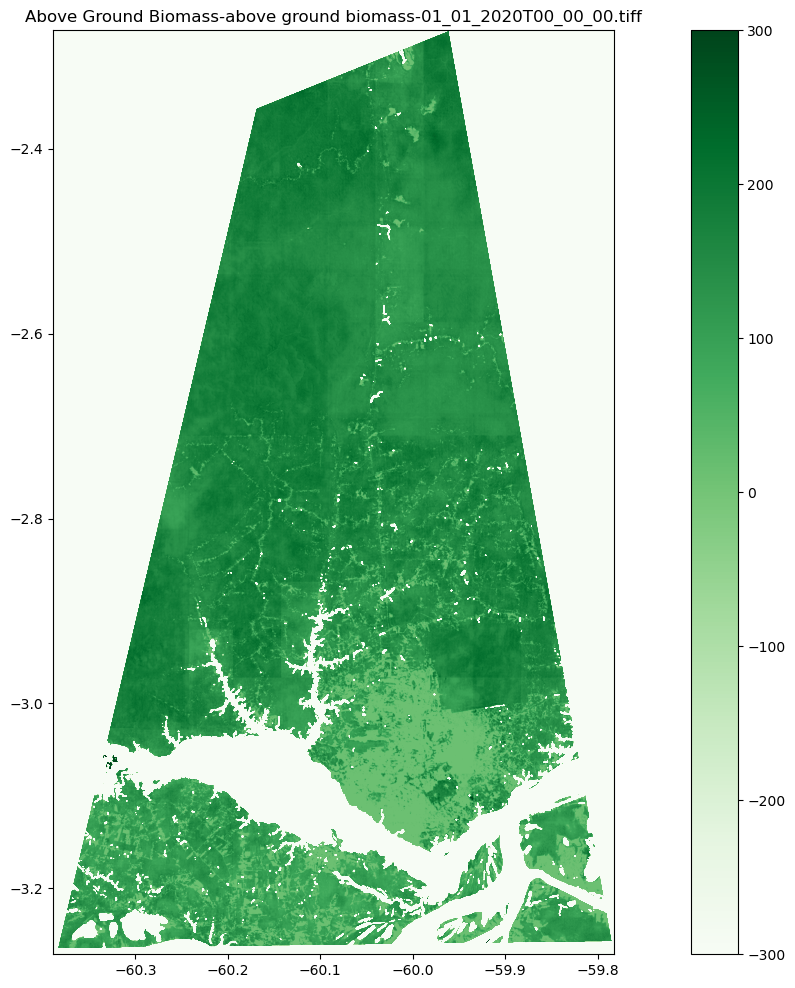

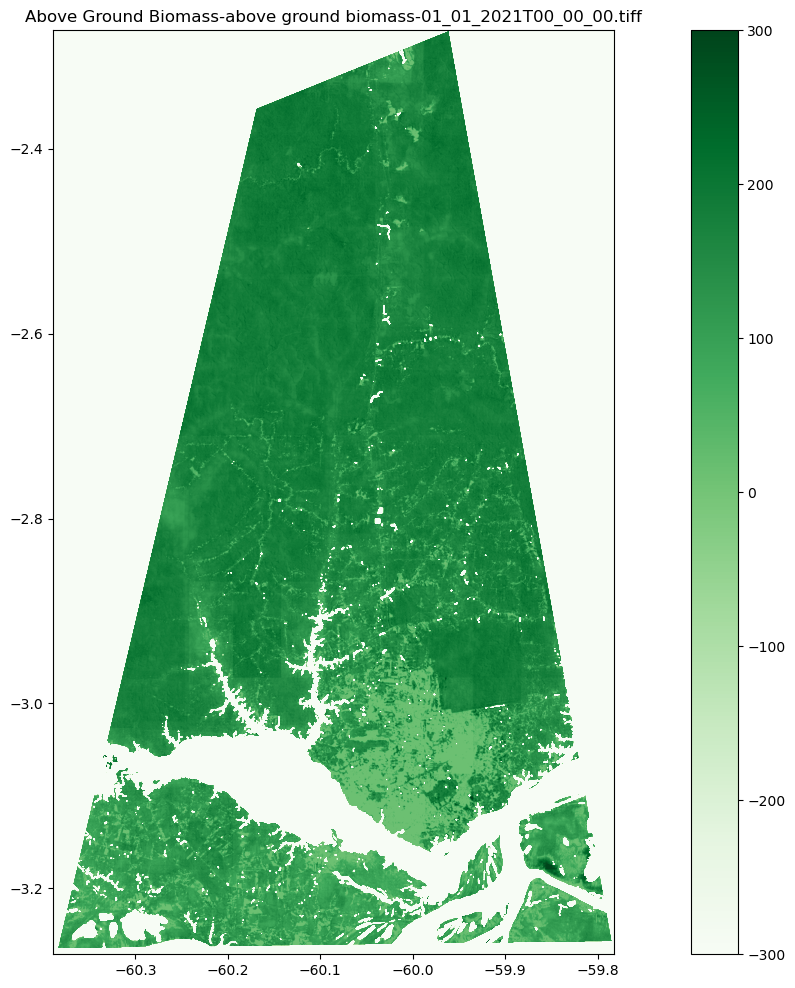

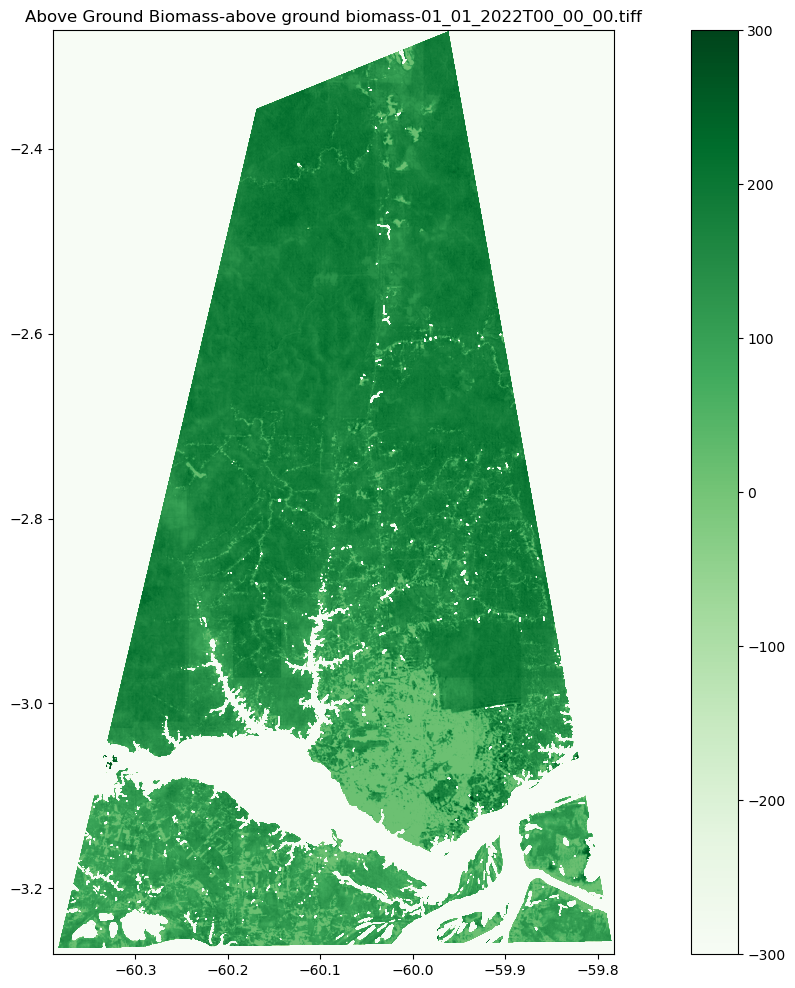

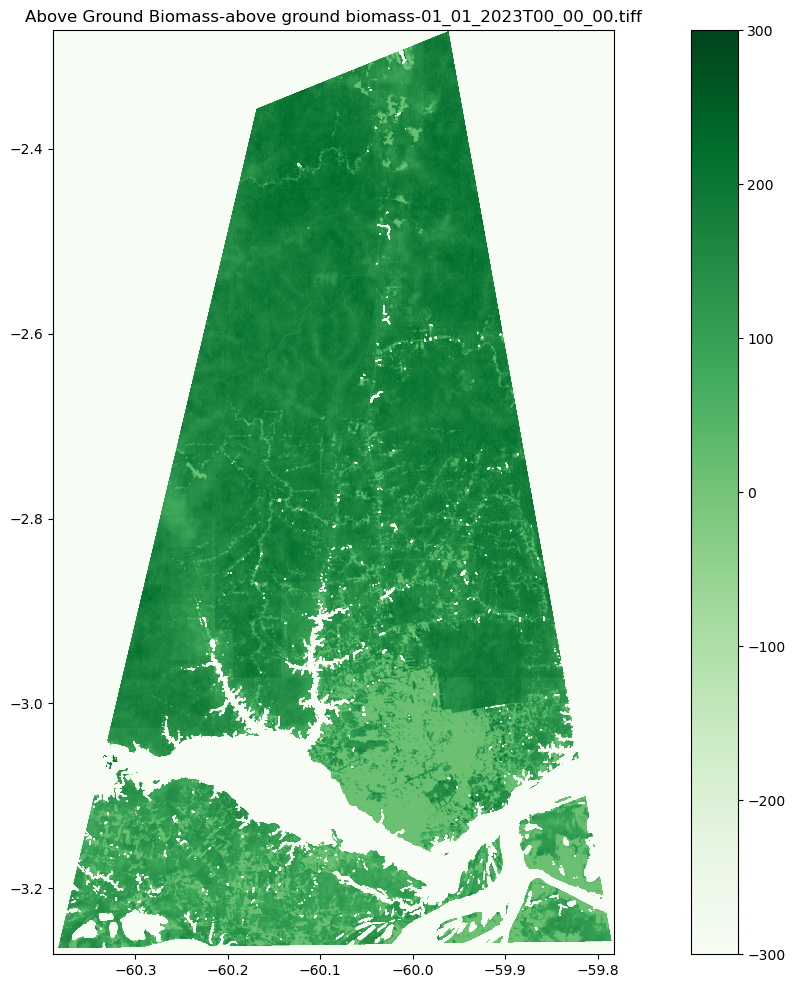

In [48]:
#sorting all the files in order from 2020 to 2023
species_agnostic_file_list.sort()
for f in species_agnostic_file_list:
    if f.endswith('.tiff'):
        display_raster(f, 'Greens', Min=-300, Max=300)  #-100 is water

### Understanding the sample:

<b>Code:</b>

Let's go over the details of the above example, 

The above code snippet is run using Geospatial Analytics V4 query API to retrieve carbon units and CO2 capture for:

* A specific area which is a Multipolygon defined as a standard Geojson format for the spatial data.

* The temporal intevals' timestamp as years. In this example, we are passing the years from 2020 to 2024 as the years. Years from 2020 to 2023 are historical baseline years while 2024 is a prediction year. Note that any years beyond the current year are prediction years.

Submitting the query above does not immediately return data because the raster area query takes time and its operation is asynchronous. In this case we use `query.submit()`. This submits the query to Geospatial Analytics V4 query API. One the query is submitted, we use `download()` method that checks the status of the query as it runs and, once complete, downloads the results of the query as a zip file.

You can see from the output of the call that that `species_agnostic_query_object.download()` prints the status of the job as it progresses.

On the first line of the log, you can see the query Id that has been assigned by Geospatial Analytics to the query job will look something like "1716940800_29946410" and is unique for each query submitted. After this, you can see the query transistion through Queued, Initializing, Running and finally succeeded. You won't necessarily see all of these stages printed out depending on how busy the Geospatial Analytics system is at the time you submit.

Once the processing is complete you can see that the resulting query zip file is placed in the download folder. This folder is usually placed inside the directory where you run this notebook from.

The library will automatically unzip this zip file for you and into a directory named after the query Id. In this case the contents are as follows:


Above Ground Biomass-above ground biomass summary agb.json</br>
Above Ground Biomass-above ground biomass-01_01_2020T00_00_00.tiff</br>
Above Ground Biomass-above ground biomass-01_01_2023T00_00_00.tiff</br>
Above Ground Biomass-above ground biomass-01_01_2022T00_00_00.tiff</br>
Above Ground Biomass-above ground biomass-01_01_2021T00_00_00.tiff</br>
Above Ground Biomass-above ground biomass-01_01_2023T00_00_00.tiff.json</br>
Above Ground Biomass-above ground biomass-01_01_2020T00_00_00.tiff.json</br>
Above Ground Biomass-above ground biomass-01_01_2021T00_00_00.tiff.json</br>
Above Ground Biomass-above ground biomass-01_01_2022T00_00_00.tiff.json</br>
data_acknowledgement.txt</br>
output.info


The `Above Ground Biomass-above ground biomass summary agb.json` file gives you a brief about the information from each year specified in the query.

As you can see the summary json file gives the agb units, carbon units and CO2 capture of historical and predicted years. It also provides the area in hectares, baseline agb min, max, mean and total units for the Data Layer <i>above-ground-biomass</i>.

``` json
[
    {
        "year": 2020,
        "layer_name": "above-ground-biomass",
        "area_in_ha": 470369.65947,
        "baseline_agb_min_units": 0.9,
        "baseline_agb_max_units": 51.3,
        "baseline_agb_mean_units": 11.878334,
        "baseline_total_agb_units": 62044456.32,
        "baseline_total_carbon_tons": 31022228.16,
        "baseline_total_co2_tons": 113851577.3472,
        "agb_analytics_type": "historical"
    },
    {
        "year": 2021,
        "layer_name": "above-ground-biomass",
        "area_in_ha": 470369.65947,
        "baseline_agb_min_units": 0.9,
        "baseline_agb_max_units": 41.58,
        "baseline_agb_mean_units": 12.975094,
        "baseline_total_agb_units": 67761699.84,
        "baseline_total_carbon_tons": 33880849.92,
        "baseline_total_co2_tons": 124342719.2064,
        "agb_analytics_type": "historical"
    },
    {
        "year": 2022,
        "layer_name": "above-ground-biomass",
        "area_in_ha": 470369.65947,
        "baseline_agb_min_units": 0.9,
        "baseline_agb_max_units": 41.13,
        "baseline_agb_mean_units": 12.885414,
        "baseline_total_agb_units": 67304759.04,
        "baseline_total_carbon_tons": 33652379.52,
        "baseline_total_co2_tons": 123504232.8384,
        "agb_analytics_type": "historical"
    },
    {
        "year": 2023,
        "layer_name": "above-ground-biomass",
        "area_in_ha": 470369.65947,
        "baseline_agb_min_units": 0.9,
        "baseline_agb_max_units": 30.06,
        "baseline_agb_mean_units": 12.141811,
        "baseline_total_agb_units": 63420687.36,
        "baseline_total_carbon_tons": 31710343.68,
        "baseline_total_co2_tons": 116376961.3056,
        "agb_analytics_type": "historical"
    },
    {
        "year": 2024,
        "layer_name": "above-ground-biomass",
        "area_in_ha": 470369.65947,
        "predicted_total_agb_units": 64720419.243173,
        "predicted_total_carbon_tons": 32360209.621586,
        "predicted_total_co2_tons": 118761969.311222,
        "agb_analytics_type": "prediction"
    }
]
```


The .tiff.json files hold metadata about the raster tiff images like the information about pixel and raster image statistics. For example:
``` json
{
    "pixelType": "fl",
    "pixelNoDataVal": -9999,
    "spatialRef": "EPSG:4326",
    "boundingBox": {
        "minLatitude": -3.271296,
        "maxLatitude": -2.271872,
        "minLongitude": -60.388608,
        "maxLongitude": -59.7824
    },
    "pixelDimensions": {
        "pixelSizeDegreeLatitude": 0.000256,
        "pixelSizeDegreeLongitude": 0.000256,
        "numberPixelsLatitude": 3904,
        "numberPixelsLongitude": 2368
    },
    "rasterStatistics": {
        "pixelMin": 10.0,
        "pixelMax": 570.0,
        "pixelCount": 9244672,
        "pixelMean": 131.978851,
        "pixelStandardDeviation": 55.44213
    },
    "agbAnalytics": {
        "area_in_ha": 470369.65947,
        "baseline_agb_min_units": 0.9,
        "baseline_agb_max_units": 51.3,
        "baseline_agb_mean_units": 11.878334,
        "baseline_total_agb_units": 62044456.32,
        "baseline_total_carbon_tons": 31022228.16,
        "baseline_total_co2_tons": 113851577.3472
    }
}
```



The `data_acknowledgement.txt` file contains acknowledgements associated with the data we provide. 

The `output.info` file maps the images files back to the Geospatial Analytics data layers that were used to produce them:

``` json
{"files":[{"name":"Above Ground Biomass-above ground biomass-01_01_2023T00_00_00","datalayerId":"38000","datalayerName":"above ground biomass","timestamp":1672531200000,"layerType":"raster"},{"name":"Above Ground Biomass-above ground biomass-01_01_2022T00_00_00","datalayerId":"38000","datalayerName":"above ground biomass","timestamp":1640995200000,"layerType":"raster"},{"name":"Above Ground Biomass-above ground biomass-01_01_2020T00_00_00","datalayerId":"38000","datalayerName":"above ground biomass","timestamp":1577836800000,"layerType":"raster"},{"name":"Above Ground Biomass-above ground biomass-01_01_2021T00_00_00","datalayerId":"38000","datalayerName":"above ground biomass","timestamp":1609459200000,"layerType":"raster"}]}
```

<b>Output:</b>

The output is displayed in two forms: 
- The first one is a table that presents the data of each year into different rows. If we observe the table, the first four rows are of historical data for the years 2020 to and 2022 and the last row consists of only predicted infomation based on the historical data as this is a predicted year.
- The second one is the raster tiff file plotted on the coordinate system. 